In [ ]:
!pip install wfdb


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 10.3 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount ('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import sys
import os
#sys.path.append('/content/gdrive/MyDrive/Augmentation-of-ECG-Training-Dataset-with-CGAN-main')
os.chdir('/content/gdrive/MyDrive/Augmentation-of-ECG-Training-Dataset-with-CGAN-main')
print(os.getcwd())

/content/gdrive/MyDrive/Augmentation-of-ECG-Training-Dataset-with-CGAN-main


In [ ]:
import json
import os

# Load JSON file
myPath_dataset = ""
with open(os.path.join(myPath_dataset, "record_X_y_adapt_win_bef075_aft075_Normalized.json"), "r") as f:
    data = json.load(f)

# Determine dimensions of data
if isinstance(data, list):
    print("Data is a list with", len(data), "elements")
elif isinstance(data, dict):
    print("Data is a dictionary with", len(data), "key-value pairs")
else:
    print("Data is not a list or dictionary")


Data is a list with 109494 elements


In [ ]:
import matplotlib.pyplot as plt
import wfdb
import numpy as np

Detected R-R Intervals (in seconds):
[0.81388889 0.78888889 0.79166667 ... 0.70277778 0.69166667 0.71388889]
this is a list with 2271 items


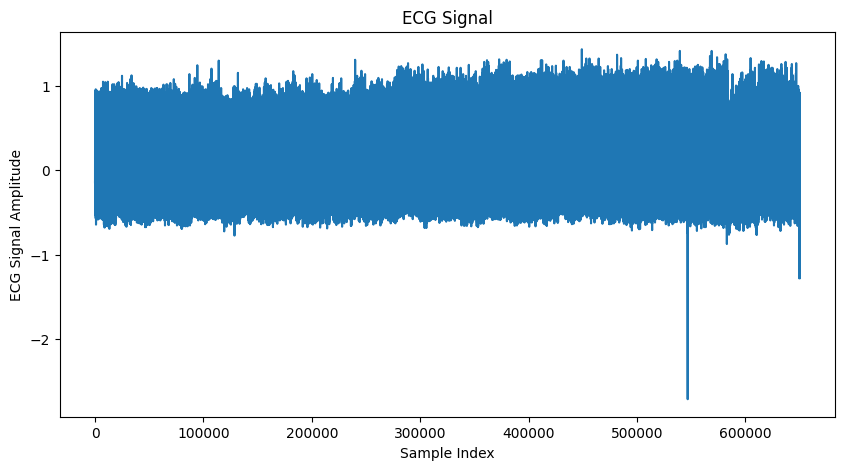

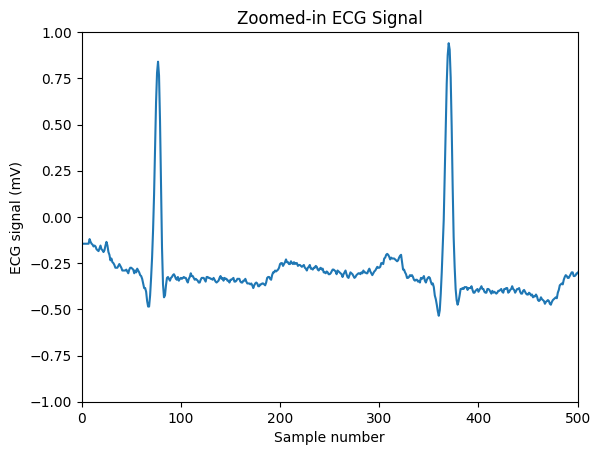

In [ ]:


# Import necessary libraries
import os
import wfdb.processing as wp
import numpy as np

# Set the path to the directory containing the .dat files
data_dir = 'dataset/mit-bih-arrhythmia-database-1.0.0'

# Load the ECG signal from the .dat file
record_name = '100'  # Example record name
record_path = os.path.join(data_dir, record_name)
signal, fields = wfdb.rdsamp(record_path)

# Extract the ECG signal and sampling frequency
ecg_signal = signal[:, 0]
fs = fields['fs']

# Detect QRS complexes using the gqrs algorithm
qrs_inds = wp.gqrs_detect(ecg_signal, fs=fs)

# Compute R-R intervals in seconds
rr_intervals_sec = np.diff(qrs_inds) / fs

# Print the detected R-R intervals
print('Detected R-R Intervals (in seconds):')
print(rr_intervals_sec)
print("this is a list with", len(rr_intervals_sec), "items")


# Plot the ECG signal
plt.figure(figsize=(10,5))
plt.plot(ecg_signal)
plt.xlabel('Sample Index')
plt.ylabel('ECG Signal Amplitude')
plt.title('ECG Signal')
plt.show()

plt.plot(ecg_signal)
plt.xlabel('Sample number')
plt.ylabel('ECG signal (mV)')
plt.title('Zoomed-in ECG Signal')
plt.xlim([0, 500])  # Set the x-axis limits
plt.ylim([-1, 1])  # Set the y-axis limits
plt.show()


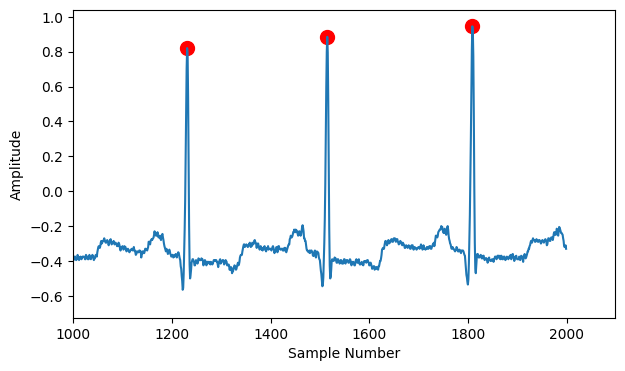

In [ ]:
import wfdb
import matplotlib.pyplot as plt

# Read the ECG signal
record = wfdb.rdrecord('dataset/mit-bih-arrhythmia-database-1.0.0/100', sampto= 2000)

# Read the annotation file
annotation = wfdb.rdann('dataset/mit-bih-arrhythmia-database-1.0.0/100', 'atr')

# Get the indices of the R-peaks
r_peaks = [1231 ,1515, 1809 ]

# Select the desired channel (e.g., channel 0)
channel = 0

# Extract the y-coordinates for the scatter plot
y_coordinates = [record.p_signal[idx][channel] for idx in r_peaks]

# Plot the ECG signal
plt.figure(figsize=(7, 4))
plt.plot(record.p_signal[:, channel])

# Plot circles on R-peaks
plt.scatter(r_peaks, y_coordinates, c='r', marker='o', s=100)

# Set labels and title
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
#plt.title('ECG Signal with R-peaks')


# Get the current x-axis limits
x_limits = plt.xlim()

# Calculate the mid-point of the x-axis
mid_point = sum(x_limits) / 2

# Set the new x-axis limits to show only the last half of the plot
plt.xlim(mid_point, x_limits[1])

# Show the updated plot
plt.show()


# Display the plot
plt.show()


In [ ]:
import wfdb
import numpy as np


In [ ]:
record = wfdb.rdrecord('100', sampto=3000)  # load first 3 seconds of data
annotation = wfdb.rdann('100', 'atr', sampto=3000)  # load corresponding annotations


In [ ]:
r_peaks = annotation.sample


In [ ]:
rr_intervals = np.diff(r_peaks)


In [ ]:
segment_lengths = np.round(0.75 * rr_intervals).astype(int)
segment_starts = r_peaks[:-1] - segment_lengths // 2
segment_ends = r_peaks[1:] + segment_lengths // 2


In [ ]:
segments = [record.p_signal[start:end] for start, end in zip(segment_starts, segment_ends)]


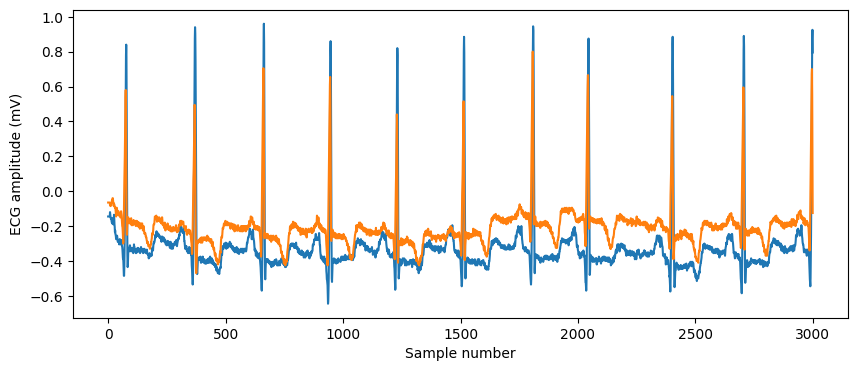

In [ ]:
import matplotlib.pyplot as plt

# Plot the ECG signal
plt.figure(figsize=(10, 4))
plt.plot(record.p_signal)
plt.xlabel('Sample number')
plt.ylabel('ECG amplitude (mV)')
#plt.title('ECG signal for patient 100')
plt.show()



segments is a Python list that contains the segmented ECG beats for a given patient. Each element of the list corresponds to a single beat and is itself a one-dimensional NumPy array that contains the ECG signal samples within that beat.

More specifically, segments is created by iterating over the R-peaks in the annotation file and calculating the start and end sample indices for each beat using the adaptive window scheme described in the question. Then, for each beat, the corresponding ECG samples are extracted from the original signal using NumPy array slicing and appended to the segments list

why two curve? ->  mit-bih database e lead-2 and lead 5 dui dhoroner data ache . generally lead-2 tai use kora hoy literature e . ojnno pore shudhu lead-2 kei rakhbo

In [ ]:
import wfdb
import numpy as np
from scipy import signal
import sys
import os
#sys.path.append('/content/gdrive/MyDrive/Augmentation-of-ECG-Training-Dataset-with-CGAN-main')
os.chdir('/content/gdrive/MyDrive/Augmentation-of-ECG-Training-Dataset-with-CGAN-main/dataset/mit-bih-arrhythmia-database-1.0.0')
#print(os.getcwd())
np.set_printoptions(precision=16)


def segment_beats(records):
    segmented_beats = {}

    for record in records:
        # Load the record and annotation
        signals, fields = wfdb.rdsamp(record)
        annotation = wfdb.rdann(record, 'atr')
        sample_shape = np.shape(annotation.sample)

        print("Shape of annotation.sample:", sample_shape)

        original_fs = fields['fs']
        beats_per_minute = 60 / np.mean(np.diff(annotation.sample))
        original_samples_per_beat = original_fs / beats_per_minute
        desired_samples_per_beat = 256
        resampling_ratio = desired_samples_per_beat / original_samples_per_beat

        # Calculate heart rate (R-R distance)
        rr_intervals = np.diff(annotation.sample) / fields['fs']
        rr_distances = rr_intervals
        #print(rr_distances.shape)

        # Segment the beats
        cutoffs = 0.75 * rr_distances
        #print(cutoffs.shape)
        beats = []
        for i, r_peak in enumerate(annotation.sample, start=0):
            start = int(r_peak - (cutoffs[i-1] * fields['fs']))
            end = int(r_peak + (cutoffs[i-1+1] * fields['fs'])) if i < len(cutoffs) - 1 else signals.shape[0]

            # Extract the segment from the original signal
            segment = signals[start:end,0]  # Assuming the first channel is used
            #print(segment.shape)
            if i>0:

            # Resample the segment
              resampled_segment = signal.resample(segment, 256)
              beats.append(resampled_segment)

        segmented_beats[record] = beats

    return segmented_beats

# List of records to process
records = ['100']

# Segment the beats for the specified records
segmented_beats = segment_beats(records)

# Print the segmented beats for each record
for record, beats in segmented_beats.items():
    print(f"Record: {record}")
    print(f"Number of segmented beats: {len(beats)}")
    print(f"First beat shape: {beats[3].shape}")
    print(beats[2])


Shape of annotation.sample: (2274,)
Record: 100
Number of segmented beats: 2273
First beat shape: (256,)
[-0.3949757867108444 -0.4118356878424948 -0.3929132956519574
 -0.4196571904905792 -0.4160872701361986 -0.4149178884709582
 -0.4201613357752012 -0.4306296084069796 -0.4304608324359669
 -0.4224751939111712 -0.445960359618099  -0.4535043757154796
 -0.4374837441697879 -0.450780533889178  -0.4617872080320176
 -0.4625838377698931 -0.447176981601481  -0.4678246945407785
 -0.4685531325232045 -0.4506479911866964 -0.4396933592473759
 -0.4383187760017183 -0.4125944644216372 -0.3750329378066743
 -0.3623495616336755 -0.3588335789016129 -0.32471882310402
 -0.3179310625789599 -0.329444730763411  -0.3230460690518064
 -0.3007880042038586 -0.3079142263977577 -0.3209042203593485
 -0.3094958836995355 -0.2986982251274147 -0.317873325196812
 -0.3188883099094103 -0.2996647974023502 -0.3071309832750221
 -0.3219765199142197 -0.3092495921636683 -0.3088756701894473
 -0.3127511909727108 -0.3129605024487107 -0.

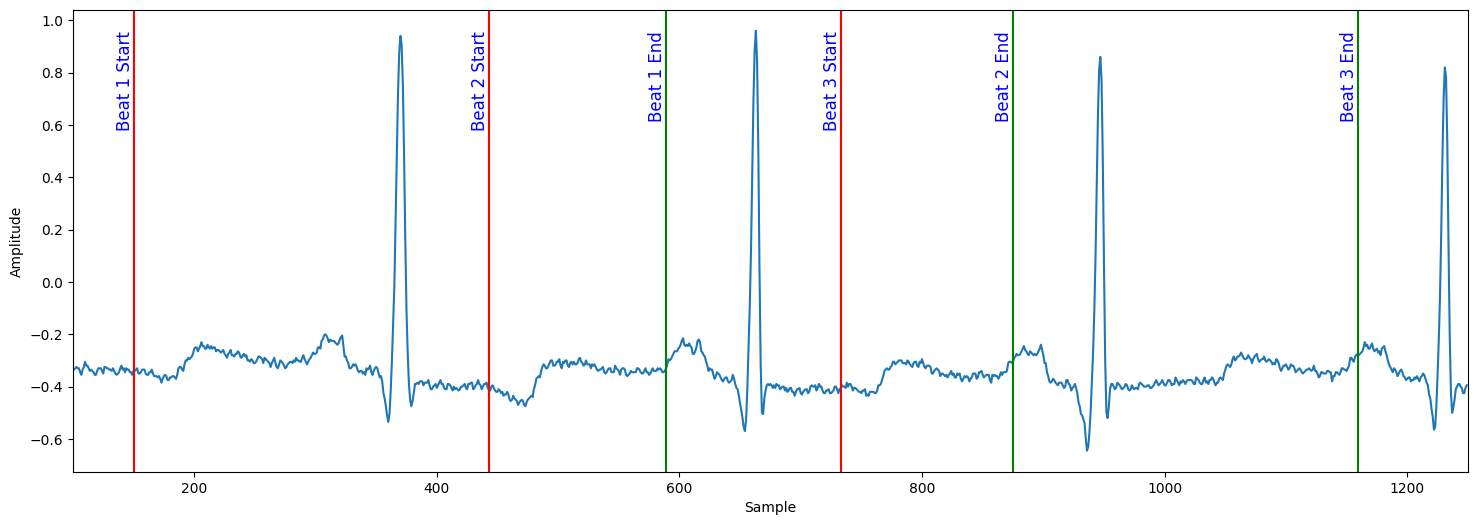

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import wfdb
from scipy import signal
os.chdir('/content/gdrive/MyDrive/Augmentation-of-ECG-Training-Dataset-with-CGAN-main/dataset/mit-bih-arrhythmia-database-1.0.0')
#print(os.getcwd())

np.set_printoptions(precision=16)

def segment_beats(records):
    segmented_beats = {}

    for record in records:
        # Load the record and annotation
        signals, fields = wfdb.rdsamp(record, sampto=1800)
        annotation = wfdb.rdann(record, 'atr', sampto=1800)
        sample_shape = np.shape(annotation.sample)

        #print("Shape of annotation.sample:", sample_shape)

        original_fs = fields['fs']
        beats_per_minute = 60 / np.mean(np.diff(annotation.sample))
        original_samples_per_beat = original_fs / beats_per_minute
        desired_samples_per_beat = 256
        resampling_ratio = desired_samples_per_beat / original_samples_per_beat

        # Calculate heart rate (R-R distance)
        rr_intervals = np.diff(annotation.sample) / fields['fs']
        rr_distances = rr_intervals
        #print(rr_distances.shape)

        # Segment the beats
        cutoffs = 0.75 * rr_distances
        #print(cutoffs.shape)
        beats = []
        plt.figure(figsize=(18, 6))
        plt.plot(signals[:1250, 0])
        plt.xlim(100, 1250)
        for i, r_peak in enumerate(annotation.sample, start=0):
            start = int(r_peak - (cutoffs[i-1] * fields['fs']))
            end = int(r_peak + (cutoffs[i-1+1] * fields['fs'])) if i < len(cutoffs) - 1 else signals.shape[0]
            if i > 1 and i<5:  # Skip plotting for the first end line
                plt.axvline(end, color='g', linestyle= 'solid',label='Ending Point of a Beat')
                #plt.axvspan(start, end, facecolor='b', alpha=0.08*i)
                plt.axvline(start, color='r', linestyle='solid',label='Starting Point of a Beat')
                plt.text(start, np.max(signals), f'Beat {i-1} Start', color='b', ha='right', va='top', rotation='vertical', fontsize=12)
                plt.text(end, np.max(signals), f'Beat {i-1} End', color='b', ha='right', va='top', rotation='vertical', fontsize=12)

            # Extract the segment from the original signal
            segment = signals[start:end, 0]  # Assuming the first channel is used
            #print(segment.shape)


        segmented_beats[record] = beats

        #plt.plot(signals[:1000, 0])
        #for cutoff in cutoffs:
            #plt.axvline(cutoff * fields['fs'], color='g', linestyle='--')
        plt.xlabel('Sample')
        plt.ylabel('Amplitude')
        #plt.title('Signal with Segmentation Cutoff Lines')
        plt.show()


    return segmented_beats

# List of records to process
records = ['100']

# Segment the beats for the specified records
segmented_beats = segment_beats(records)




In [ ]:
#  Normalize the values of the beats between -1 and 1
normalized_beats = {}
np.set_printoptions(precision=16)

for record, beats in segmented_beats.items():
    normalized_record_beats = []
    for beat in beats:
        # Min-Max normalization to range [-1, 1]
        min_value = np.min(beat)
        max_value = np.max(beat)
        normalized_beat = 2 * (beat - (max_value + min_value) / 2) / (max_value - min_value)

        normalized_record_beats.append(normalized_beat)

    normalized_beats[record] = normalized_record_beats

# `normalized_beats` now contains the normalized beats for each record, ranging from -1 to 1
print()


In [ ]:
for record, beats in normalized_beats.items():
    print(f"Record: {record}")
    print(f"Number of segmented beats: {len(beats)}")
    print(f"First beat shape: {beats[76].shape}")
    print(beats[4])

Record: 100
Number of segmented beats: 2273
First beat shape: (256,)
[-0.7036020949921938 -0.7284618587589502 -0.7147580019394714
 -0.718901112443374  -0.7370413600028666 -0.727247563891203
 -0.7049406244559432 -0.729562553161544  -0.7422748878192472
 -0.7179770396399436 -0.7170336219296365 -0.7359845639585324
 -0.7239395059962787 -0.7065134706146537 -0.7186270656897499
 -0.7441708251513166 -0.7319049869696024 -0.7072701181885529
 -0.7123284463202406 -0.697256146735865  -0.6466962306549727
 -0.6299372918900734 -0.6429659981544413 -0.6172237001491072
 -0.5890833850988776 -0.6033985882859215 -0.58372215046502
 -0.5756693373791734 -0.5686336788764986 -0.5976217272332413
 -0.5975393449623396 -0.5834870519717006 -0.5922850437584369
 -0.6155085426294319 -0.5892553579622843 -0.5716306618533024
 -0.5965523526626632 -0.6127080629080925 -0.596022957213758
 -0.5931724483731946 -0.610739607419383  -0.6049616334050424
 -0.6040839675756414 -0.6244097921943226 -0.6253039144506188
 -0.6067583395256547

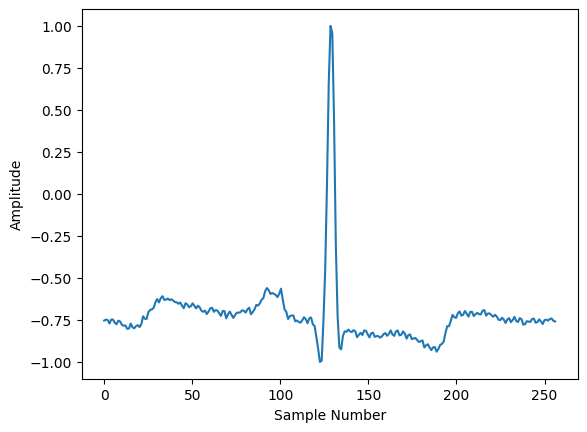

In [ ]:
import matplotlib.pyplot as plt

# Get the first beat from the segmented beats
first_beat = normalized_beats['100'][1]

# Generate the x-axis values for the beat plot
time = np.linspace(0, len(first_beat), len(first_beat))

# Plot the beat
plt.plot(time, first_beat)
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
#plt.title('First Beat(Normalized) - Record 100')
plt.show()


This is the normalized dataset for record 100 .  Similarly i have implemneted the same process for each record and put them in the dictionary . Then i created a dataframe along with the label list and put them into a json file.

In [ ]:
import pandas as pd

# Create an empty DataFrame
df_list = []

# Iterate over the segmented beats dictionary
for record, beats in normalized_beats.items():
    # Load the annotation file
    annotation = wfdb.rdann(record, 'atr')

    # Extract the beat labels
    labels = annotation.symbol[1:]
    print("Length of beats:", len(beats))
    print("Length of labels:", len(labels))


    # Create DataFrame for the record
    df_record = pd.DataFrame({'0': record, '1': beats, '2': labels})

    # Append the DataFrame to the list
    df_list.append(df_record)

# Concatenate the DataFrames in the list
df = pd.concat(df_list, ignore_index=True)

# Display the resulting DataFrame
print(df)


Length of beats: 2273
Length of labels: 2273
        0                                                  1  2
0     100  [-0.6461278855043799, -0.6561813193025865, -0....  N
1     100  [-0.7538103384601511, -0.7477707362859722, -0....  N
2     100  [-0.7641687068774201, -0.786611267123138, -0.7...  N
3     100  [-0.6372363221402324, -0.6728214643016632, -0....  N
4     100  [-0.703602094992194, -0.7284618587589502, -0.7...  N
...   ...                                                ... ..
2268  100  [-0.7104438217346883, -0.7446077279032561, -0....  N
2269  100  [-0.630899283547085, -0.6772480986295257, -0.6...  N
2270  100  [-0.6777889805523964, -0.7221294029357633, -0....  N
2271  100  [-0.5938004844869388, -0.2504267804920187, -0....  N
2272  100  [-0.3315573038992393, -0.2633913548230784, -0....  N

[2273 rows x 3 columns]


In [ ]:
# Save the DataFrame as a JSON file
df.to_json('', orient='records')

/content/gdrive/MyDrive/Augmentation-of-ECG-Training-Dataset-with-CGAN-main/dataset/ThesisDataset.json

In [ ]:
import pandas as pd
df =pd.read_json("/content/gdrive/MyDrive/Augmentation-of-ECG-Training-Dataset-with-CGAN-main/dataset/ThesisDataset.json")
df.head()

,0,1,2
0,100,"[-0.6461278855, -0.6561813193, -0.683889968500...",N
1,100,"[-0.7538103385, -0.7477707363, -0.7507327298, ...",N
2,100,"[-0.7641687069, -0.7866112671000001, -0.761423...",N
3,100,"[-0.6372363221, -0.6728214643, -0.6658730157, ...",N
4,100,"[-0.703602095, -0.7284618588, -0.7147580019, -...",N


The cross-correlation coefficient measures the linear similarity between two signals or images. It evaluates how well the two signals are correlated or related to each other. The cross-correlation coefficient ranges from -1 to 1, with 1 indicating a perfect positive correlation. The formula for the cross-correlation coefficient is as follows:

Cross-correlation coefficient = Σ[(I(x, y) - μx) * (K(x, y) - μy)] / (σx * σy)

where I(x, y) and K(x, y) are the original and reconstructed signals or images, μx and μy are their means, and σx and σy are their standard deviations.

In [ ]:
#testing for cross corelation
import numpy as np
from scipy.stats import pearsonr
from scipy.special import kl_div
from scipy.special import rel_entr
from scipy.spatial.distance import euclidean

# Assuming your DataFrame has columns named '1' and '2' for beats and labels, respectively

# Select two beats from the DataFrame
beat1 = df.loc[2, 1]  # Assuming you want the first beat
beat2 = df.loc[22, 1]  # Assuming you want the second beat
distance = euclidean(beat1, beat2)
#print(distance)

# Calculate the Pearson correlation coefficient between the two beats
corr_coef, p_value = pearsonr(beat1, beat2)


# Calculate the cross-correlation coefficient between the two beats
#corr_coeff = np.corrcoef(beat1, beat2)[0, 1]

# Convert the beats to probability distributions
prob_dist1, _ = np.histogram(beat1, bins='auto', density=True)
prob_dist2, _ = np.histogram(beat2, bins='auto', density=True)

# Add a small epsilon value to the probability distributions
epsilon = 1e-8
prob_dist1 += epsilon
prob_dist2 += epsilon

# Ensure the probability distributions have the same shape
min_len = min(len(prob_dist1), len(prob_dist2))
prob_dist1 = prob_dist1[:min_len]
prob_dist2 = prob_dist2[:min_len]

# Calculate the Kullback-Leibler Divergence
#kld = kl_div(prob_dist1, prob_dist2).sum()
kld = np.sum(rel_entr(prob_dist1, prob_dist2))

print(corr_coef)
#print(p_value)

# The resulting corr_coeff value will range between -1 and 1, representing the cross-correlation coefficient



0.7723449765315675
5.623185630447844e-52


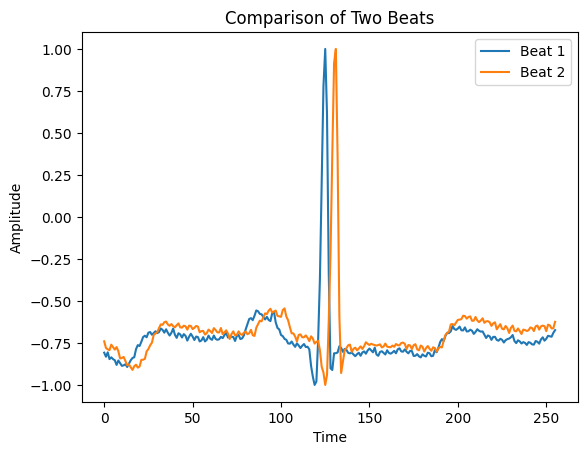

In [ ]:
import matplotlib.pyplot as plt

# Assuming your DataFrame has columns named '1' and '2' for beats and labels, respectively

# Select two beats from the DataFrame
beat1 = df.loc[21, 1]  # Assuming you want the first beat
beat2 = df.loc[9, 1]  # Assuming you want the second beat

# Set up the figure and axes
fig, ax = plt.subplots()

# Plot beat1
ax.plot(beat1, label='Beat 1')

# Plot beat2
ax.plot(beat2, label='Beat 2')

# Set the labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Amplitude')
ax.set_title('Comparison of Two Beats')

# Add a legend
ax.legend()

# Display the plot
plt.show()


Structural Similarity Index (SSIM):
SSIM is a perceptual metric that measures the structural similarity between the original and reconstructed images or signals. It considers three aspects of similarity: luminance, contrast, and structure. The SSIM index ranges from -1 to 1, with 1 indicating perfect similarity. Higher SSIM values indicate better similarity between the two images or signals. The SSIM formula is as follows:

SSIM = (2μxμy + C1) * (2σxy + C2) / ((μx^2 + μy^2 + C1) * (σx^2 + σy^2 + C2))

where μx and μy are the mean values of the original and reconstructed images or signals, σx and σy are the standard deviations, σxy is the covariance, and C1 and C2 are small constants added for stability.

In [ ]:


from skimage.metrics import structural_similarity as ssim
import numpy as np

# Assuming your DataFrame has columns named '1' and '2' for beats and labels, respectively

# Select two beats from the DataFrame
beat1 = np.array(df.loc[17, 1])  # Assuming you want the first beat
beat2 = np.array(df.loc[10, 1])  # Assuming you want the second beat

# Calculate the SSIM between the two beats
ssim_score = ssim(beat1, beat2)

# Print the SSIM score
print(ssim_score)



0.8585002286856634


In [ ]:
import json
import os
#sys.path.append('/content/gdrive/MyDrive/Augmentation-of-ECG-Training-Dataset-with-CGAN-main')
os.chdir('/content/gdrive/MyDrive/Augmentation-of-ECG-Training-Dataset-with-CGAN-main')

import pandas as pd
df =pd.read_json("/content/gdrive/MyDrive/Augmentation-of-ECG-Training-Dataset-with-CGAN-main/record_X_y_adapt_win_bef075_aft075_Normalized.json")
df.head()

# get the list in the third column of the first row
my_list = df.iloc[0, 1]

# print the list
print(my_list)


# get the number of values in the list
num_values = len(my_list)


[-0.49404929340833503, -0.47418571929942605, -0.481694868732067, -0.477595794630896, -0.48003206033956103, -0.47876956769113505, -0.47830661361677806, -0.442753274266836, -0.469699066962646, -0.481047747394851, -0.49642896208789206, -0.498271572492654, -0.49831538759768806, -0.526162025627627, -0.532991635370844, -0.538207408251535, -0.498234777086681, -0.5134577940210621, -0.53288120917909, -0.5457195745335971, -0.529538341271323, -0.48207652155655006, -0.46896651894768004, -0.529466744101295, -0.565057765604809, -0.6098358053403671, -0.6056242366633751, -0.633973210991805, -0.642044953110236, -0.668660410939227, -0.6780241062851291, -0.67765937112338, -0.661213481501812, -0.648433194991192, -0.665880541269502, -0.688596037623151, -0.7025117413781351, -0.6985346374402851, -0.700722018415816, -0.6921027151697281, -0.714456303042806, -0.7142354818232071, -0.6781914657396071, -0.679259703584778, -0.67953191557296, -0.699331756399684, -0.714975929983637, -0.7069074588723011, -0.7019966246

In [ ]:
print(df.head())

     0                                                  1  2
0  100  [-0.49404929340833503, -0.47418571929942605, -...  N
1  100  [-0.735071018173704, -0.731108315854984, -0.75...  N
2  100  [-0.7641687068774201, -0.7866112671231381, -0....  N
3  100  [-0.6372363221402321, -0.672821464301663, -0.6...  N
4  100  [-0.697322103368012, -0.734988349769482, -0.71...  N


In [ ]:
!pip install similaritymeasures

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for similaritymeasures: filename=similaritymeasures-0.7.0-py3-none-any.whl size=15452 sha256=79402b196d755694e1360cbfec1c56707b6a54e5310bcc290bd5d9eb2ecdf78d
  Stored in directory: /root/.cache/pip/wheels/24/a6/80/6f1676caf08ab1b69d74c8a727c96fdd3903d891672b415008
Successfully built similaritymeasures


In [ ]:
#calculates average DTW distance of beats (generated or real)
#from a visually selected template

import json
import os
import sys
from datetime import datetime
from statistics import mean

import numpy as np
from skimage.metrics import structural_similarity as ssim
from scipy.spatial.distance import euclidean
from similaritymeasures import frechet_dist as frechet
#from dtaidistance.dtw import distance as dtw
os.chdir('/content/gdrive/MyDrive/Augmentation-of-ECG-Training-Dataset-with-CGAN-main')

start_time = datetime.now()
print(("\n" + "*" * 61 + "\n\t\t\t\t\tstart time  {0:02d}:{1:02d}:{2:02.0f}\n" + "*" * 61).format(
    start_time.hour, start_time.minute, start_time.second))

aug_key = "augmented"
# aug_key = ""

cond_key = "uncond"
# cond_key = "cond"

screen_key = "screened"
# screen_key = "not_screened"

drive = ""
myPath_base = os.path.join(drive, "")

aux_path_2 = "paper2_data\\MIT_BIH\\gb_{}\\{}".format(cond_key, screen_key)
# aux_path_3 ="paper3_data\\gb_{}\\gb_{}_{}".format(cond_key, screen_key)
# f_name_3 = "data_gb_dict_{}_{}.json"

# recall: classes2keep = ['P', 'A', 'L', 'N', 'R', 'f', 'j']

cl = 'A'
# print('class: {}, {}, {}'.format(cl, cond_key, screen_key))
print('real data, class: {}'.format(cl))
f_name_2 = "gb_{}_{}_{}.json".format(cl, cond_key, screen_key)

myPath_template = os.path.join(myPath_base, "PyCharmProjects\paper2_data/MIT_BIH/templates")
f_name_template = "templates_{}_.json".format(cl)
#PyCharmProjects\paper2_data/MIT_BIH/templates/templates_A_.json

#myPath_read_gb = os.path.join(myPath_base, aux_path_2)
myPath_read_rl = os.path.join(os.path.join(drive, "PyCharmProjects\paper2_data/MIT_BIH/data_rl"))

with open(os.path.join(myPath_read_rl, "data_rl_dict.json"), 'r') as f:
    data_rl_dict = json.load(f)

# with open(os.path.join(myPath_read_gb, f_name_2), 'r') as f:
#    beats_all = json.load(f)

# beats = beats_all[:5000]
with open(os.path.join(myPath_template, f_name_template), 'r') as f:
    templates = json.load(f)

template_num = 3
template = templates[template_num]

if len(data_rl_dict[cl]) <= 5000:
    beats = data_rl_dict[cl]
else:
    beats = data_rl_dict[cl][:5000]

dist_dtw = []
dist_frechet = []
for idx, beat in enumerate(beats):
    #dist_dtw.append(euclidean(beat,template))
    #dist_dtw.append(dtw(beat,template))
    beat = np.array(beat).reshape(-1, 1)
    template = np.array(template).reshape(-1, 1)
    dist_frechet.append(frechet(beat, template))

#dist_dtw_mean = mean(dist_dtw)
dist_frechet_mean = mean(dist_frechet)


original_stdout = sys.stdout
# %%%%%%%%%%%%%%%%%%%%%%% begin: write to file (genbeats) %%%%%%%%%%%%%%%%%%%%%%%%%%%%
"""
with open(os.path.join(myPath_read_gb, 'dist_{}_{}.txt'.format(cond_key, screen_key)), 'a') as f:
    sys.stdout = f
    print('\nNumber of beats in the class {}: {}\n'.format(cl, len(beats)))
    print('Average DTW distance of genbeats ({}, {}) from template # {}:'.format(cond_key, screen_key, template_num))
    print('\n\tcl: {}\n\tave DTW: {:5.3f}'.format(cl, dist_dtw_mean))
    print('%' * 60)

    # print('\nAverage Frechet distance of genbeats ({}, {}:)'.format(cond_key, screen_key))
    # print('\t ave Frechet: {:5.3f}'.format(dist_frechet_mean))
"""
# %%%%%%%%%%%%%%%%%%%%%%% end: write to file (genbeats) %%%%%%%%%%%%%%%%%%%%%%%%%%%%


# %%%%%%%%%%%%%%%%%%%%%%% begin: write to file (data_rl_dict) %%%%%%%%%%%%%%%%%%%%%%%%%%
with open(os.path.join(myPath_base, "PyCharmProjects\paper2_data/final_report_files", "frechet_real_beats.txt"), 'a') as f:
    sys.stdout = f
    print('\nNumber of beats in the class {}: {}\n'.format(cl, len(beats)))
    print('Average DTW distance of real beats from template # {}:'.format(template_num))
    #print('\n\tcl: {}\n\tave DTW: {:5.3f}'.format(cl, dist_dtw_mean))
    print('\n\tcl: {}\n\tave Frechet distance: {:5.3f}'.format(cl, dist_frechet_mean))
    print('%' * 60)


# %%%%%%%%%%%%%%%%%%%%%%% end: write to file (data_rl_dict) %%%%%%%%%%%%%%%%%%%%%%%%%%%%

sys.stdout = original_stdout

finish_time = datetime.now()
print(("\n\n\n" + "finish time = {0:02d}:{1:02d}:{2:02.0f}").format(
    finish_time.hour, finish_time.minute, finish_time.second))

laps = finish_time - start_time
tot_sec = laps.total_seconds()
h = int(tot_sec // 3600)
m = int((tot_sec % 3600) // 60)
s = int(tot_sec - (h * 3600 + m * 60))

print("total elapsed time = {:02d}:{:02d}:{:02d}".format(h, m, s))

a = 0



*************************************************************
					start time  08:31:46
*************************************************************
real data, class: A



finish time = 08:35:55
total elapsed time = 00:04:08
